# Predict Loan Eligibility for Dream Housing Finance company

## - Problem statement
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

## Data Dictionary
The dataset was gotten from the analytics vidya hackathon platform.There is the train, val, and test file available to download. For the purpose of this project I have used only the train.csv file to train and validate a machine learning model.

Train file: This is a CSV file containing the customers for whom loan eligibility is known as `Loan_Status`

The description of data attributes is as follows:

|Attributes|Description|
|-|-|
|loan id | Applicant's unqiue loan id|
|gender|  Applicant's gender male/female|
|married | Whether applicant is married or not (Y/N)|
|dependents | Number of dependents on applicant|
|education |  Education level of applicant(graduate/under graduate)|
|self-employed | self employed (y/n)|
|applicant-income | Applicant income|
|co-applicant income | Coapplicant's income, who is apply with applicant as money borrowers.|
|loan amount | Loan amount in thousands|
|loan amount term | Amount of time the lender gives you to repay your loan.|
|credit history | Credit history meets guidlines|
|property area | urban/semi urban / rural|
|loan status | loan approved(y/n)|

This is binary classification machine learning problem, where we will predict the `loan_status` which describes `1` if application is approved and `0` if application is rejected.

## Importing the libraries

In [53]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import xgboost as xgb
import warnings  
warnings.filterwarnings('ignore')
sns.set_theme('talk')
plt.rcParams['figure.dpi'] = 70
plt.rcParams['figure.figsize'] = [8, 5]

## Load the data 

In [18]:
df=pd.read_csv('C:/Users/HP/Documents/workspace/proj/train_ctrUa4K.csv')

In [19]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The structure in the data consists of `objects`, `floats` & `int`. There are `614` rows and `13` columns in the data. 

In [21]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


The `statistical distribution` in the data.

## Data preprocessing

The `columns` in the data needs to be preprocessed such as converting them into `lower str`, and replacing the space inbetween with `_`.

In [23]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

#string_columns = list(df.dtypes[df.dtypes == 'object'].index)

#for col in string_columns:
    #df[col] = df[col].str.lower().str.replace(' ', '_')

In [24]:
df

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [25]:
df.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

There are several missing values in the data.

In [26]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

loan_id
['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008']
614

gender
['Male' 'Female' nan]
2

married
['No' 'Yes' nan]
2

dependents
['0' '1' '2' '3+' nan]
4

education
['Graduate' 'Not Graduate']
2

self_employed
['No' 'Yes' nan]
2

applicantincome
[5849 4583 3000 2583 6000]
505

coapplicantincome
[   0. 1508. 2358. 4196. 1516.]
287

loanamount
[ nan 128.  66. 120. 141.]
203

loan_amount_term
[360. 120. 240.  nan 180.]
10

credit_history
[ 1.  0. nan]
2

property_area
['Urban' 'Rural' 'Semiurban']
3

loan_status
['Y' 'N']
2



The above shows us the first `5 unique` values in the data, the `nan` present is as a result of the `missing value`in the data and this will be treated.

In [27]:
df

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Data Exploratory Analysis (EDA)

In [28]:
df['gender'].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: gender, dtype: float64

Text(0.5, 1.0, 'Applicant distribution by Gender')

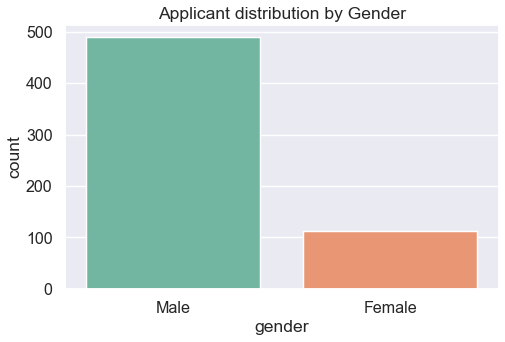

In [90]:
sns.countplot(x='gender', data=df, palette = 'Set2')
plt.title("Applicant distribution by Gender")


`81%` of the customers that apply for the `loan` are `male`.

In [30]:
df['married'].value_counts(normalize=True)

Yes    0.651391
No     0.348609
Name: married, dtype: float64

Text(0.5, 1.0, 'Applicant distribution by Marriage status')

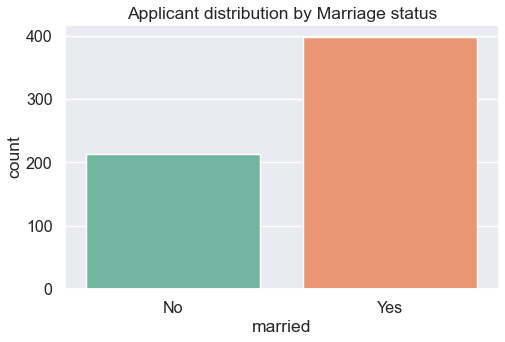

In [89]:
sns.countplot(x='married', data=df, palette = 'Set2')
plt.title("Applicant distribution by Marriage status")


`65%` of the customers are `married`, `35%` of the customers are `unmarried`.

In [32]:
df['dependents'].value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: dependents, dtype: float64

Text(0.5, 1.0, 'Applicant distribution by Dependents')

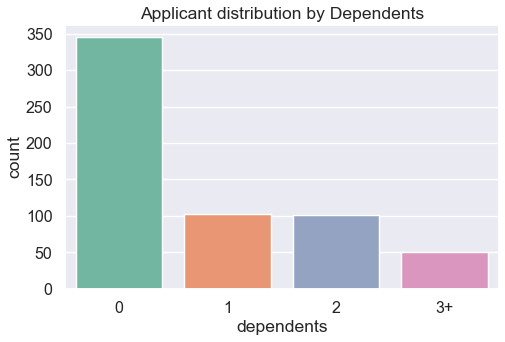

In [88]:
sns.countplot(x='dependents', data=df, palette = 'Set2')
plt.title("Applicant distribution by Dependents")


- `57%` of the applicant which represent majority of the applicants has `0 dependent`.

- `17%` of the applicants has `1 dependent`, and `2 dependent` respectively.

- `0.08%` has about `3+ dependent` which represent the least number of applicants.

In [34]:
df['education'].value_counts(normalize=True)

Graduate        0.781759
Not Graduate    0.218241
Name: education, dtype: float64

Text(0.5, 1.0, 'Applicant distribution by Education')

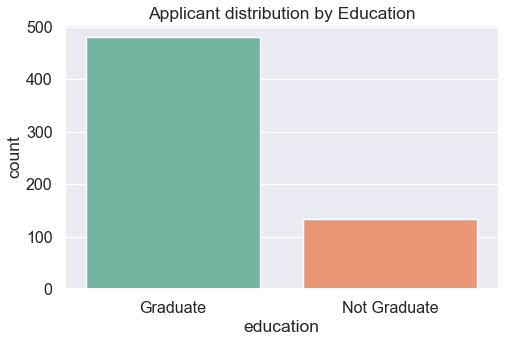

In [87]:
sns.countplot(x='education', data=df, palette = 'Set2')
plt.title("Applicant distribution by Education")


`78% `of the loan applicants are `graduates`, `22%` are not `graduates`.

In [37]:
d = df['loan_status'].groupby(df['education']).value_counts(normalize=True)
d

education     loan_status
Graduate      Y              0.708333
              N              0.291667
Not Graduate  Y              0.611940
              N              0.388060
Name: loan_status, dtype: float64

Text(0.5, 1.0, 'Rate of Loan approval by Education')

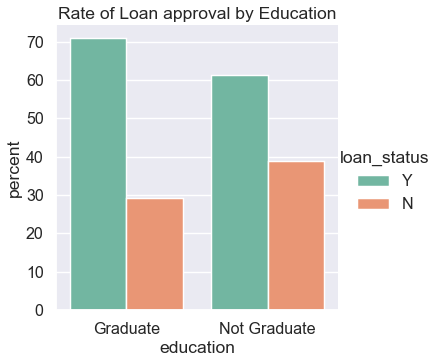

In [86]:
x,y = 'education', 'loan_status'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette = 'Set2' ))
plt.title("Rate of Loan approval by Education")


There is `70%` loan approval rate for `graduate` and `30%` `non approval` rate for `graduate` as against the `61%` percent approval rate for `non graduate` and `39%` approval rate for `non graduate`. 

In [22]:
df['loan_status'].groupby(df['gender']).value_counts(normalize=True)

gender  loan_status
Female  Y              0.669643
        N              0.330357
Male    Y              0.693252
        N              0.306748
Name: loan_status, dtype: float64

Text(0.5, 1.0, 'Rate of Loan approval by gender')

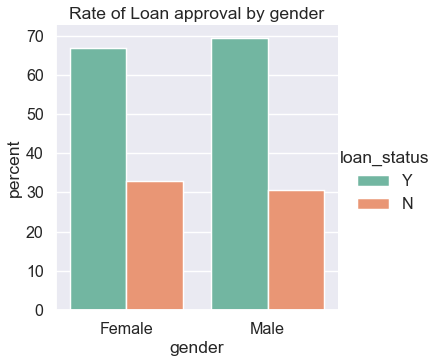

In [83]:
x,y = 'gender', 'loan_status'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar', palette = 'Set2'))
plt.title("Rate of Loan approval by gender")


There is little or no difference between loan approval status and gender. However, the male gender approval status is slightly higher than the female gender.

In [24]:
df['loan_status'].groupby(df['property_area']).value_counts(normalize=True)

property_area  loan_status
Rural          Y              0.614525
               N              0.385475
Semiurban      Y              0.768240
               N              0.231760
Urban          Y              0.658416
               N              0.341584
Name: loan_status, dtype: float64

Text(0.5, 1.0, 'Rate of Loan approval by property area')

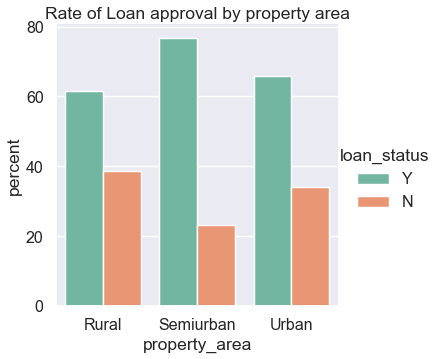

In [84]:
x,y = 'property_area', 'loan_status'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar', palette = 'Set2'))
plt.title("Rate of Loan approval by property area")


- The loan approval rate in the `semiurban` area is higher than the other two areas.

- The semiurban area has a `78%` approval rate and `22%` non approval rate.

- The Rural area has a `61%` approval rate & `28%` non approval rate.

- The Urban area has a `66%` approval rate & `24%` non approval rate.

In [26]:
df['loan_status'].groupby(df['married']).value_counts(normalize=True)

married  loan_status
No       Y              0.629108
         N              0.370892
Yes      Y              0.716080
         N              0.283920
Name: loan_status, dtype: float64

Text(0.5, 1.0, 'Loan approval by marriage status')

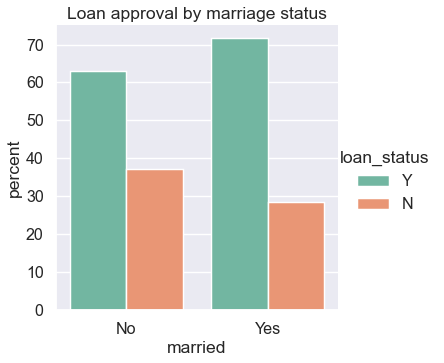

In [81]:
x,y = 'married', 'loan_status'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar', palette = 'Set2'))
plt.title("Loan approval by marriage status")


The percentage rate laon approval of the married applicant is slightly higher than that of the unmarried applicant.

In [28]:
df['loan_status'].groupby(df['credit_history']).value_counts(normalize=True)

credit_history  loan_status
0.0             N              0.921348
                Y              0.078652
1.0             Y              0.795789
                N              0.204211
Name: loan_status, dtype: float64

Text(0.5, 1.0, 'Loan approval by credit history')

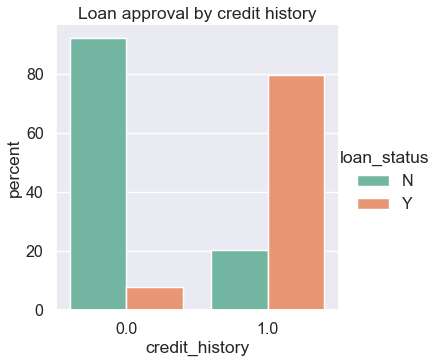

In [80]:
x,y = 'credit_history', 'loan_status'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar', palette = 'Set2'))
plt.title("Loan approval by credit history")


The plot shows a high rejection rate for those without credit history, those with credit history have a higher chance of getting approval for a loan.

Text(0.5, 1.0, 'Imbalanced class distribution for the target variable')

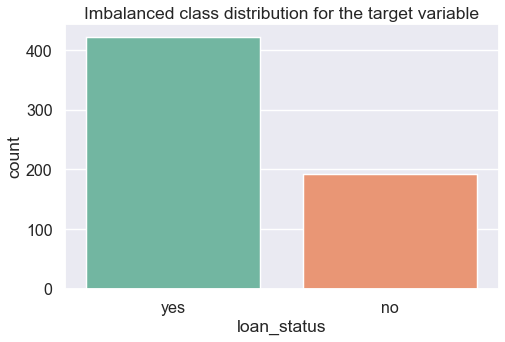

In [79]:
sns.countplot(x='loan_status', data=df, palette = 'Set2')
plt.xticks(ticks=[0, 1], labels=['yes', 'no'], rotation=0)
plt.title("Imbalanced class distribution for the target variable")


The above plot shows a `class imbalance` in the target variable `loan status`, the class with `yes` is higher than the `no` class.

## EDA for Numerical Variable

<AxesSubplot:xlabel='applicantincome', ylabel='Count'>

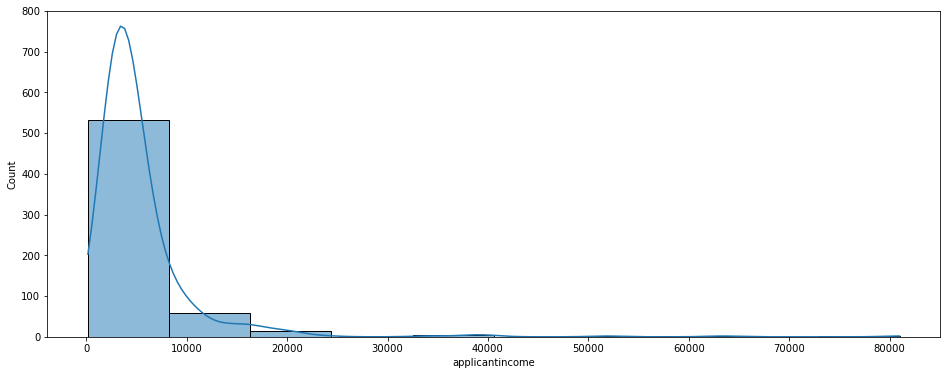

In [30]:
fig= plt.figure(figsize=(16,6))
sns.histplot(df['applicantincome'],kde=True, bins=10)

looking at the above plot, there is a long tail distribution in the applicant income.

<AxesSubplot:xlabel='coapplicantincome', ylabel='Count'>

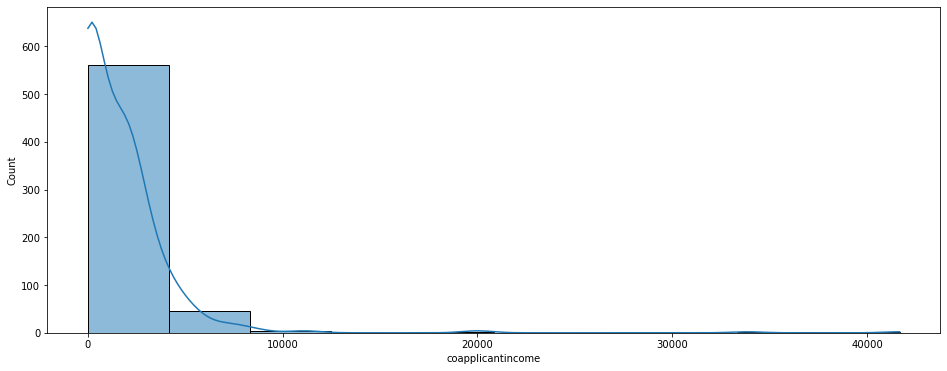

In [31]:
fig= plt.figure(figsize=(16,6))
sns.histplot(df['coapplicantincome'],kde=True, bins=10)

<AxesSubplot:xlabel='loanamount', ylabel='Count'>

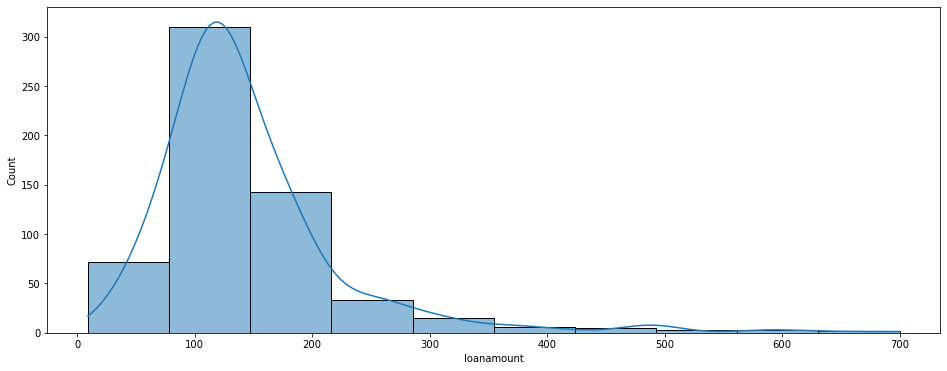

In [32]:
fig= plt.figure(figsize=(16,6))
sns.histplot(df['loanamount'],kde=True, bins=10)

<AxesSubplot:xlabel='loan_amount_term', ylabel='Count'>

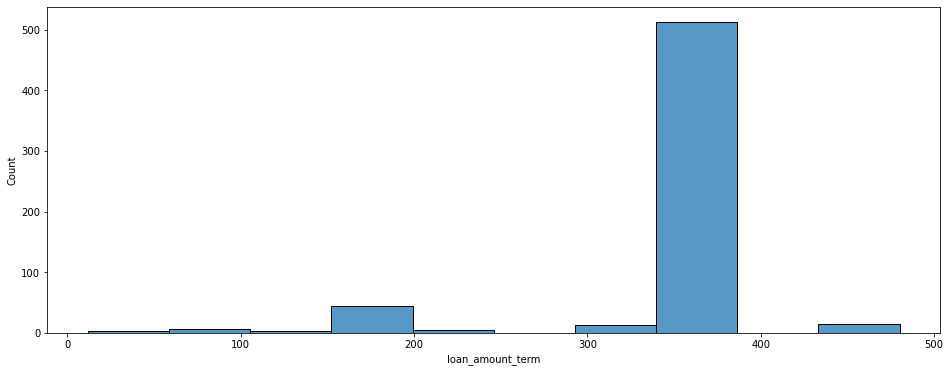

In [33]:
fig= plt.figure(figsize=(16,6))
sns.histplot(df['loan_amount_term'], bins=10)

From the plots above on the numerical variables, all except the loan amount term is not a gaussian distribution. The loan amount time which signifies the number of time given to repay the loan.

The following features will be transfromed to make it a gausian distribution:

- `loanamount`
- `applicantincome`
- `coapplicantincome`

In [34]:
df['loanamount'] = np.log1p(df['loanamount'])
df['applicantincome'] = np.log1p(df['applicantincome'])
df['coapplicantincome'] = np.log1p(df['coapplicantincome'])

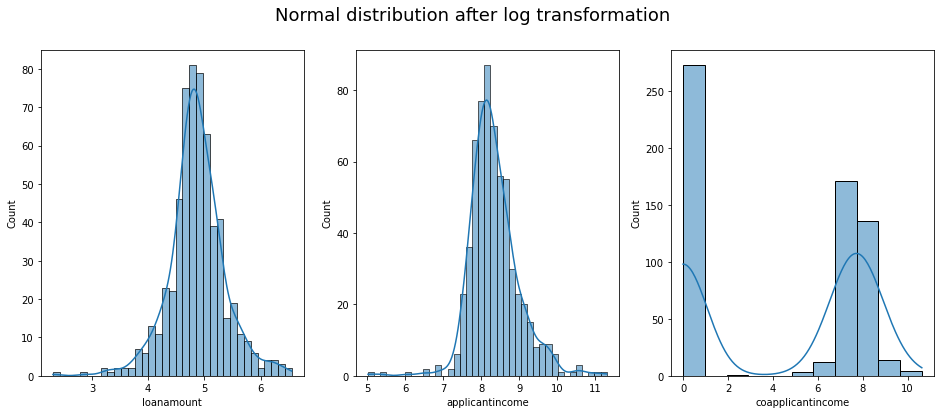

In [35]:
# Plot - Normal distribution after log transformation
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

fig.suptitle("Normal distribution after log transformation", size=18)

sns.histplot(data=df, x='loanamount',kde=True, ax=ax1)
sns.histplot(data=df, x='applicantincome',kde=True, ax=ax2)
sns.histplot(data=df, x='coapplicantincome',kde=True, ax=ax3)

plt.show()

## Treating Missing Data 

In [36]:
df.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [37]:
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['married'].fillna(df['married'].mode()[0], inplace=True)
df['dependents'].fillna(df['dependents'].mode()[0], inplace=True)
df['self_employed'].fillna(df['self_employed'].mode()[0], inplace=True)
df['loanamount'].fillna(df['loanamount'].mode()[0], inplace=True)
df['loan_amount_term'].fillna(df['loan_amount_term'].mode()[0], inplace=True)
df['credit_history'].fillna(df['credit_history'].mode()[0], inplace=True)

The missing data was treated using the mode value.

In [38]:
df.isnull().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

We have a clean and ready dataset to start building the model.

In [39]:
cat_col= df.select_dtypes(include=['object', 'category']).columns
num_col= [col for col in df.columns if col not in cat_col]
print(cat_col)

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'property_area', 'loan_status'],
      dtype='object')


In [40]:
print(num_col)

['applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history']


## Encoding the Catergorical Variable

In [41]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [42]:
le=LabelEncoder()
for l in cat_col:
    df[l]= le.fit_transform(df[l])

In [43]:
df

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,0,1,0,0,0,0,8.674197,0.000000,4.795791,360.0,1.0,2,1
1,1,1,1,1,0,0,8.430327,7.319202,4.859812,360.0,1.0,0,0
2,2,1,1,0,0,1,8.006701,0.000000,4.204693,360.0,1.0,2,1
3,3,1,1,0,1,0,7.857094,7.765993,4.795791,360.0,1.0,2,1
4,4,1,0,0,0,0,8.699681,0.000000,4.955827,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,7.972811,0.000000,4.276666,360.0,1.0,0,1
610,610,1,1,3,0,0,8.320448,0.000000,3.713572,180.0,1.0,0,1
611,611,1,1,1,0,0,8.996280,5.484797,5.537334,360.0,1.0,2,1
612,612,1,1,2,0,0,8.933796,0.000000,5.236442,360.0,1.0,2,1


## Splitting the data into train, val, and test

In [44]:
#splitting the data
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size= 0.25, random_state=1)
len(df_train), len(df_test), len(df_val)

(368, 123, 123)

In [45]:
#re-indexing the data
df_train= df_train.reset_index(drop=True)
df_test= df_test.reset_index(drop=True)
df_val= df_val.reset_index(drop=True)

#setting up the output variable
y_train= df_train['loan_status'].values
y_test= df_test['loan_status'].values
y_val= df_val['loan_status'].values
#y_full_train = df_full_train['loan_status'].values

#deleting the output variable from the train data
del df_train['loan_status']
del df_test['loan_status']
del df_val['loan_status']

In [46]:
df_train

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
0,438,1,0,0,0,1,9.251194,0.000000,5.236442,360.0,0.0,2
1,157,1,1,1,0,0,9.163144,0.000000,5.236442,360.0,1.0,2
2,536,1,1,0,0,0,8.721602,8.270525,5.783825,360.0,1.0,2
3,499,1,0,0,0,0,8.745762,8.393216,5.347108,360.0,0.0,0
4,46,1,1,1,0,0,8.639411,0.000000,3.806662,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
363,451,1,1,2,1,0,7.580189,7.284135,4.110874,300.0,1.0,2
364,396,0,0,0,0,0,8.064951,0.000000,4.276666,360.0,0.0,2
365,140,1,1,2,0,0,8.525756,7.642044,5.225747,360.0,1.0,0
366,537,1,0,2,0,0,8.193677,0.000000,4.682131,360.0,1.0,1


## Baseline Model - Logistic Regression

In [47]:
#converting the 
train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
x_train = dv.transform(train_dict)


val_dict = df_val.to_dict(orient='records')
x_val = dv.transform(val_dict)

In [48]:
#traing the model
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [53]:
from sklearn.metrics import accuracy_score

In [49]:
#model score
model.score(x_val, y_val).round(3)

0.797

In [54]:
thresholds = np.linspace(0, 1, 21)

In [55]:
accuracy_scores= []
for t in thresholds:
    score= accuracy_score(y_val, y_pred)
    print('%.2f %.3f' %(t, score))
    accuracy_scores.append(score)

0.00 0.797
0.05 0.797
0.10 0.797
0.15 0.797
0.20 0.797
0.25 0.797
0.30 0.797
0.35 0.797
0.40 0.797
0.45 0.797
0.50 0.797
0.55 0.797
0.60 0.797
0.65 0.797
0.70 0.797
0.75 0.797
0.80 0.797
0.85 0.797
0.90 0.797
0.95 0.797
1.00 0.797


Our first model gave an accuracy of `0.797`. However, accuracy is not a really good metrics for evaluation `classification model` due to `class imbalance`. For the rest model, we will evaluate them using the `ROC_AUC_CURVE`.

In [50]:
# #model evaluation
# y_pred = model.predict(x_val)
# print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.40      0.58        42
           1       0.76      1.00      0.87        81

    accuracy                           0.80       123
   macro avg       0.88      0.70      0.72       123
weighted avg       0.84      0.80      0.77       123



## Plotting a confusion table 

In [56]:
#confusion matrix
cm=confusion_matrix(y_val, y_pred)

Text(33.0, 0.5, 'Actual')

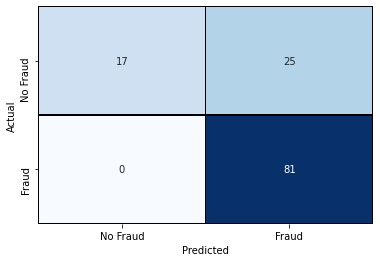

In [57]:
#visualizing the confusion matrix table
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues',cbar=False, linewidths=0.5, linecolor='Black')
plt.xticks(np.arange(2)+0.5, ['No Fraud', 'Fraud'])
plt.yticks(np.arange(2)+0.5, ['No Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel('Actual')

Looking at the above confusion table, we can see the tpr which is 81 and the fpr which is 25. This means that 81 were predicted correctly and out of that 81, 21 were false. We will use this confusion table to plot and determine the roc_auc_curve for evaluation our model.

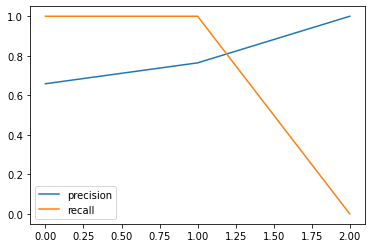

In [58]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds= precision_recall_curve(y_val, y_pred)


plt.plot(precision, label='precision')
plt.plot(recall, label= 'recall')

plt.legend()
plt.show()

In [59]:
#roc curve
fpr, tpr, thresholds  = roc_curve(y_val, y_pred)

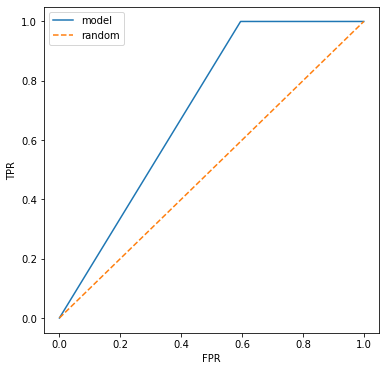

In [60]:
plt.figure(figsize = (6,6))

plt.plot(fpr, tpr, label = 'model')
plt.plot([0,1],[0,1], label = 'random', linestyle = '--')


plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [61]:
roc_auc_score(y_val,y_pred).round(3)

0.702

After plotting and evaluating the logistic regression model using roc_auc_score, we got a performance of `0.702`.

# Decision Tree Classifier

## Baseline Model

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dt= DecisionTreeClassifier()

In [64]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [65]:
y_pred= dt.predict(x_val)

In [66]:
auc= roc_auc_score(y_val, y_pred)

In [91]:
auc.round(3)

NameError: name 'auc' is not defined

The decision tree baseline model gave a score of 0.63, however, we need to check and be careful of overfitting.

In [68]:
#checking for overfitting
y_pred = dt.predict(x_train)
roc_auc_score(y_train, y_pred)

1.0

We can see that the Decision tree baseline model did overfit.

## Parameter tunning for Decision Tree

We will use the following parameters to tune our decision tree model:

- `max_depth`

- `min_sample_leaf`



In [69]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [70]:
y_pred = dt.predict(x_train)
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict(x_val)
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7219476285624146
val: 0.7023809523809523


In [71]:
from sklearn.tree import export_text

In [72]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- credit_history <= 0.50
|   |--- loanamount <= 6.17
|   |   |--- coapplicantincome <= 9.00
|   |   |   |--- class: 0
|   |   |--- coapplicantincome >  9.00
|   |   |   |--- class: 1
|   |--- loanamount >  6.17
|   |   |--- class: 1
|--- credit_history >  0.50
|   |--- coapplicantincome <= 9.47
|   |   |--- married <= 0.50
|   |   |   |--- class: 1
|   |   |--- married >  0.50
|   |   |   |--- class: 1
|   |--- coapplicantincome >  9.47
|   |   |--- class: 0



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [73]:
from tqdm.auto import tqdm

In [74]:
depths = [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20, None]
for depth in depths:
    dt=DecisionTreeClassifier(max_depth=depth)
    dt.fit(x_train, y_train)
    
    y_pred = dt.predict(x_val)
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.702
   2 -> 0.702
   3 -> 0.702
   4 -> 0.690
   5 -> 0.654
   6 -> 0.666
   8 -> 0.653
  10 -> 0.658
  12 -> 0.621
  14 -> 0.646
  16 -> 0.615
  18 -> 0.616
  20 -> 0.669
None -> 0.645


In [75]:
scores = []

for depth in [1, 2, 3]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200,  500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(x_train, y_train)

        y_pred = dt.predict(x_val)
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [76]:
col = ['max-depth', 'min-sample-leaf', 'auc']
score = pd.DataFrame(scores, columns = col).round(3)
score

,max-depth,min-sample-leaf,auc
0,1,1,0.702
1,1,2,0.702
2,1,5,0.702
3,1,10,0.702
4,1,15,0.702
5,1,20,0.702
6,1,100,0.500
7,1,200,0.500
8,1,500,0.500
9,2,1,0.702


In [77]:
score.sort_values(by = 'auc', ascending = False).head()


,max-depth,min-sample-leaf,auc
10,2,2,0.714
0,1,1,0.702
23,3,20,0.702
22,3,15,0.702
21,3,10,0.702


In [78]:
score_pivot = score.pivot(index='min-sample-leaf', columns=['max-depth'], values=['auc'])
score_pivot.round(3)

auc              
max-depth            1      2      3
min-sample-leaf                     
1                0.702  0.702  0.702
2                0.702  0.714  0.690
5                0.702  0.702  0.695
10               0.702  0.702  0.702
15               0.702  0.702  0.702
20               0.702  0.702  0.702
100              0.500  0.500  0.500
200              0.500  0.500  0.500
500              0.500  0.500  0.500

<AxesSubplot:xlabel='None-max-depth', ylabel='min-sample-leaf'>

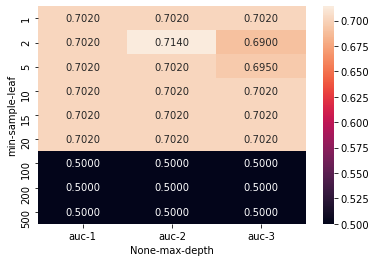

In [79]:
sns.heatmap(score_pivot, annot=True, fmt=".4f")


In [80]:
max_depth=2
min_samples_leaf=2
dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)

In [81]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- credit_history <= 0.50
|   |--- loanamount <= 4.86
|   |   |--- class: 0
|   |--- loanamount >  4.86
|   |   |--- class: 0
|--- credit_history >  0.50
|   |--- coapplicantincome <= 9.47
|   |   |--- class: 1
|   |--- coapplicantincome >  9.47
|   |   |--- class: 0



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [82]:
y_pred = dt.predict(x_val)
roc_auc_score(y_val,y_pred).round(3) 

0.714

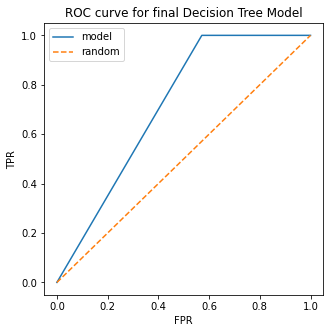

In [83]:
fpr, tpr, thresholds  = roc_curve(y_val, y_pred)

plt.figure(figsize = (5,5))
plt.plot(fpr, tpr, label = 'model')
plt.plot([0,1],[0,1], label = 'random', linestyle = '--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title("ROC curve for final Decision Tree Model")
plt.show()

# Random Forest Model

# Base Model

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [86]:
y_pred = rf.predict(x_val)

In [87]:
roc_auc_score(y_val,y_pred) 

0.7244268077601411

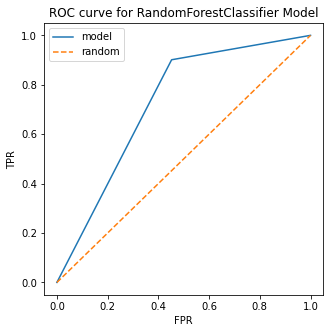

In [88]:
fpr, tpr, thresholds  = roc_curve(y_val, y_pred)

plt.figure(figsize = (5,5))
plt.plot(fpr, tpr, label = 'model')
plt.plot([0,1],[0,1], label = 'random', linestyle = '--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title("ROC curve for RandomForestClassifier Model")
plt.show()

#  Performance tuning for RF

`n_estimator`

In [89]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(x_train, y_train)

    y_pred = rf.predict(x_val)
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [90]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.724427
1,20,0.725309
2,30,0.725750
3,40,0.713845
4,50,0.725750
5,60,0.713845
6,70,0.731922
7,80,0.731922
8,90,0.720018
9,100,0.720018


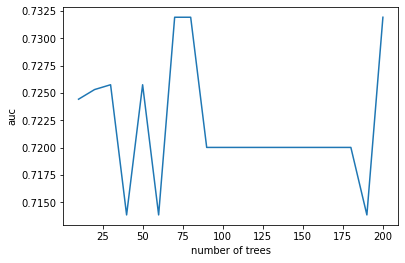

In [91]:
plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel('number of trees')
plt.ylabel('auc')
plt.show()

In [92]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth =d, 
                                    random_state=1)
        rf.fit(x_train, y_train)

        y_pred = rf.predict(x_val)
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [93]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.696208
1,5,20,0.714286
2,5,30,0.714286
3,5,40,0.714286
4,5,50,0.714286


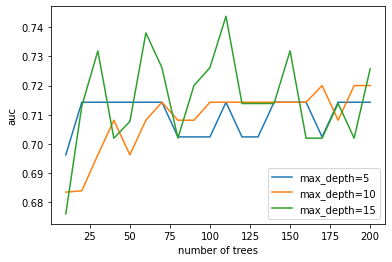

In [94]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)


plt.legend()
plt.xlabel('number of trees')
plt.ylabel('auc')
plt.show()

Best `max_depth` = 15

# Tuning min_sample_leaf

In [95]:
max_depth = 15

scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth =max_depth, 
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(x_train, y_train)

        y_pred = rf.predict(x_val)
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [96]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.675926
1,1,20,0.712963
2,1,30,0.731922
3,1,40,0.701940
4,1,50,0.707672


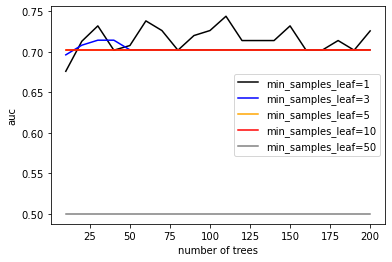

In [97]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color = col, 
             label='min_samples_leaf=%d' % s)


plt.legend()
plt.xlabel('number of trees')
plt.ylabel('auc')
plt.show()
#pt.ylim(0.60,0.75)


# final RF classifier model

`min_samples_leaf` = 1
`max_depth` = 15
`n_estimators` = 70 

In [98]:
min_samples_leaf = 1
max_depth = 15
n_estimators = 70 

In [99]:
rf = RandomForestClassifier(n_estimators=n_estimators,
                                    max_depth =max_depth, 
                                    min_samples_leaf=1,
                                    random_state=1)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=70, random_state=1)

In [100]:
y_pred = rf.predict(x_val)
auc = roc_auc_score(y_val, y_pred).round(3)
auc

0.726

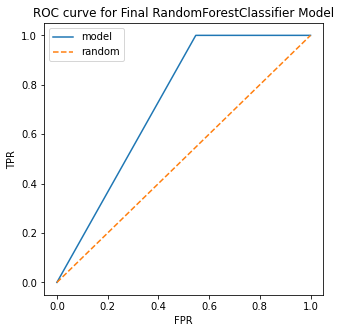

In [101]:
fpr, tpr, thresholds  = roc_curve(y_val, y_pred)

plt.figure(figsize = (5,5))
plt.plot(fpr, tpr, label = 'model')
plt.plot([0,1],[0,1], label = 'random', linestyle = '--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title("ROC curve for Final RandomForestClassifier Model")
plt.show()

# XGBOOST

In [102]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(x_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(x_val, label=y_val, feature_names=features)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [103]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [104]:
y_pred = model.predict(dval)

In [105]:
roc_auc_score(y_val, y_pred)

0.763668430335097

`Xgboost is prone to overfitting this has to be considered while growing the tree`

In [106]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [107]:
%%capture output


xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [108]:
print(output.stdout)

[0]	train-auc:0.82659	val-auc:0.73163
[5]	train-auc:0.95450	val-auc:0.72325
[10]	train-auc:0.97781	val-auc:0.72546
[15]	train-auc:0.99688	val-auc:0.74397
[20]	train-auc:0.99881	val-auc:0.74662
[25]	train-auc:0.99986	val-auc:0.74427
[30]	train-auc:1.00000	val-auc:0.74015
[35]	train-auc:1.00000	val-auc:0.74427
[40]	train-auc:1.00000	val-auc:0.74721
[45]	train-auc:1.00000	val-auc:0.74868
[50]	train-auc:1.00000	val-auc:0.74927
[55]	train-auc:1.00000	val-auc:0.74721
[60]	train-auc:1.00000	val-auc:0.75103
[65]	train-auc:1.00000	val-auc:0.75250
[70]	train-auc:1.00000	val-auc:0.75073
[75]	train-auc:1.00000	val-auc:0.74838
[80]	train-auc:1.00000	val-auc:0.75220
[85]	train-auc:1.00000	val-auc:0.75250
[90]	train-auc:1.00000	val-auc:0.75162
[95]	train-auc:1.00000	val-auc:0.75279
[100]	train-auc:1.00000	val-auc:0.75073
[105]	train-auc:1.00000	val-auc:0.75220
[110]	train-auc:1.00000	val-auc:0.75162
[115]	train-auc:1.00000	val-auc:0.74838
[120]	train-auc:1.00000	val-auc:0.74985
[125]	train-auc:1.0000

In [109]:
# s = output.stdout

In [110]:
# line = s.split('\n')[0]

In [111]:
# line.split('\t')

In [112]:
# num_iter, train_auc, val_auc = line.split('\t')

In [113]:
# train_auc

In [114]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [115]:
df_score = parse_xgb_output(output)
df_score

,num_iter,train_auc,val_auc
0,0,0.82659,0.73163
1,5,0.95450,0.72325
2,10,0.97781,0.72546
3,15,0.99688,0.74397
4,20,0.99881,0.74662
5,25,0.99986,0.74427
6,30,1.00000,0.74015
7,35,1.00000,0.74427
8,40,1.00000,0.74721
9,45,1.00000,0.74868


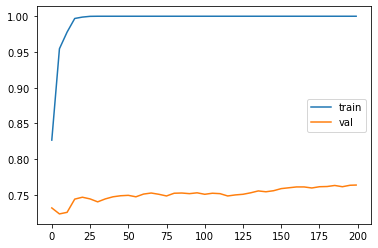

In [116]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

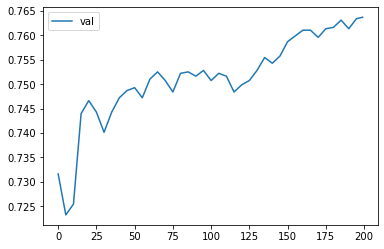

In [117]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [118]:
df_score[df_score.val_auc == df_score.val_auc.max()]


,num_iter,train_auc,val_auc
40,199,1.0,0.76367


The best `auc` is gotten at `199` `iteration`

# Parameter tuning for XGboost

- `eta` (also called learning rate)


- `max_depth` (maximum depth of a tree)


- `min_child_weight` (min sample required in a node or leaf)

In [119]:
scores = {}
etas = [0.01, 0.05, 0.1, 0.3, 0.5, 1]

In [120]:
%%capture output


xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [121]:
key = f'eta={etas[0]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : eta=0.01


In [122]:
scores[key]

,num_iter,train_auc,val_auc
0,0,0.82659,0.73163
1,5,0.90320,0.73192
2,10,0.93552,0.74574
3,15,0.94763,0.74721
4,20,0.96063,0.73486
5,25,0.96740,0.73516
6,30,0.97353,0.73810
7,35,0.98083,0.74456
8,40,0.98756,0.73868
9,45,0.99155,0.74486


In [123]:
%%capture output

xgb_params['eta'] = etas[1]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [124]:
key = f'eta={etas[1]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : eta=0.05


In [125]:
%%capture output

xgb_params['eta'] = etas[2]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [126]:
key = f'eta={etas[2]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : eta=0.1


In [127]:
%%capture output

xgb_params['eta'] = etas[3]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [128]:
key = f'eta={etas[3]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : eta=0.3


In [129]:
%%capture output

xgb_params['eta'] = etas[4]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [130]:
key = f'eta={etas[4]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : eta=0.5


In [131]:
%%capture output

xgb_params['eta'] = etas[5]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [132]:
key = f'eta={etas[5]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : eta=1


In [133]:
scores.keys()

dict_keys(['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=0.5', 'eta=1'])

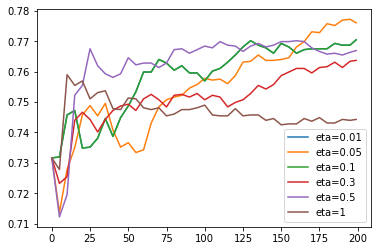

In [134]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

from the above, eta 0.01 perfom worst as i could not see it in the plot. eta 1 was doing good but didnt grow above 5 iterations, eta 0.5 at about 125 itrations didnt grow beyond that and at about 155 iterations it starts to overfit. eta 0.3 continues to grow, eta 0.1 learns slowly but continues to grow, eta 0.05 learns the slowest and starts to overfit at 200 iterations.

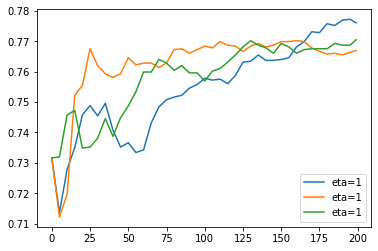

In [135]:
etas = ['eta=0.05','eta=0.5','eta=0.1' ]

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

the best eta is `eta=0.05`, even though it took about `176 iterations` to attain the best model before overfitting. `eta=0.5`, and `eta=0.1` are can also be selected. Looking at both etas they are still growing and might need more iterations to attain the best model.

- `eta=0.05` is the best eta.

# Tuning parameter for `max_depth`

In [136]:
scores = {}
max_depth = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20 ]

In [137]:
%%capture output


xgb_params = {
    'eta': 0.05, 
    'max_depth': 1,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [138]:
key = f'max_depth={max_depth[0]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : max_depth=1


In [139]:
%%capture output

xgb_params['max_depth'] = max_depth[1]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [140]:
key = f'max_depth={max_depth[1]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : max_depth=2


In [141]:
%%capture output

xgb_params['max_depth'] = max_depth[2]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [142]:
key = f'max_depth={max_depth[2]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : max_depth=4


In [143]:
%%capture output

xgb_params['max_depth'] = max_depth[3]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [144]:
key = f'max_depth={max_depth[3]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : max_depth=6


In [145]:
%%capture output

xgb_params['max_depth'] = max_depth[4]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [146]:
key = f'max_depth={max_depth[4]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : max_depth=8


In [147]:
%%capture output

xgb_params['max_depth'] = max_depth[5]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [148]:
key = f'max_depth={max_depth[5]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : max_depth=10


In [149]:
%%capture output

xgb_params['max_depth'] = max_depth[6]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [150]:
key = f'max_depth={max_depth[6]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : max_depth=12


In [151]:
%%capture output

xgb_params['max_depth'] = max_depth[7]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [152]:
key = f'max_depth={max_depth[7]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : max_depth=14


In [153]:
%%capture output

xgb_params['max_depth'] = max_depth[8]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [154]:
key = f'max_depth={max_depth[8]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : max_depth=16


In [155]:
%%capture output

xgb_params['max_depth'] = max_depth[9]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [156]:
key = f'max_depth={max_depth[9]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : max_depth=18


In [157]:
%%capture output

xgb_params['max_depth'] = max_depth[10]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [158]:
key = f'max_depth={max_depth[10]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : max_depth=20


In [159]:
scores.keys()

dict_keys(['max_depth=1', 'max_depth=2', 'max_depth=4', 'max_depth=6', 'max_depth=8', 'max_depth=10', 'max_depth=12', 'max_depth=14', 'max_depth=16', 'max_depth=18', 'max_depth=20'])

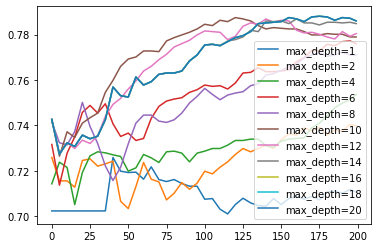

In [160]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

(0.77, 0.8)

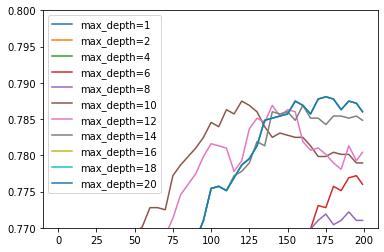

In [161]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()
plt.ylim(0.77,0.80)

- `max_depth` 1 (blue) or `max_depth` `10` seems to be the best option, though `max_depth` `10` seeems to start overfitting at about `125` iterations. The final option to go with is `max_depth` `1` because it seems to be the lowest `depth` and also gives the best performance.


- `max_depth` 1 is the best option.

# Tuning performance for min_child_weight

In [162]:
scores = {}
child_weight = [1, 2, 4, 5, 10, 15, 20, 25, 30, 40, 50]

In [163]:
%%capture output


xgb_params = {
    'eta': 0.05, 
    'max_depth': 1,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [164]:
key = f'min_child_weight={child_weight[0]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : min_child_weight=1


In [165]:
%%capture output

xgb_params['min_child_weight'] = child_weight[1]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [166]:
key = f'min_child_weight={child_weight[1]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : min_child_weight=2


In [167]:
%%capture output

xgb_params['min_child_weight'] = child_weight[2]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [168]:
key = f'min_child_weight={child_weight[2]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : min_child_weight=4


In [169]:
%%capture output

xgb_params['min_child_weight'] = child_weight[3]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [170]:
key = f'min_child_weight={child_weight[3]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : min_child_weight=5


In [171]:
%%capture output

xgb_params['min_child_weight'] = child_weight[4]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [172]:
key = f'min_child_weight={child_weight[4]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : min_child_weight=10


In [173]:
%%capture output

xgb_params['min_child_weight'] = child_weight[5]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [174]:
key = f'min_child_weight={child_weight[5]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : min_child_weight=15


In [175]:
%%capture output

xgb_params['min_child_weight'] = child_weight[6]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [176]:
key = f'min_child_weight={child_weight[6]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : min_child_weight=20


In [177]:
%%capture output

xgb_params['min_child_weight'] = child_weight[7]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [178]:
key = f'min_child_weight={child_weight[7]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : min_child_weight=25


In [179]:
%%capture output

xgb_params['min_child_weight'] = child_weight[8]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [180]:
key = f'min_child_weight={child_weight[8]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : min_child_weight=30


In [181]:
%%capture output

xgb_params['min_child_weight'] = child_weight[9]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [182]:
key = f'min_child_weight={child_weight[9]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : min_child_weight=40


In [183]:
%%capture output

xgb_params['min_child_weight'] = child_weight[10]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [184]:
key = f'min_child_weight={child_weight[10]}'
scores[key] = parse_xgb_output(output)
print(f'key : {key}')

key : min_child_weight=50


In [185]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=2', 'min_child_weight=4', 'min_child_weight=5', 'min_child_weight=10', 'min_child_weight=15', 'min_child_weight=20', 'min_child_weight=25', 'min_child_weight=30', 'min_child_weight=40', 'min_child_weight=50'])

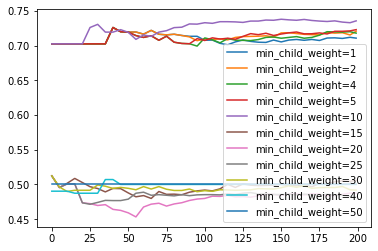

In [186]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

(0.7, 0.8)

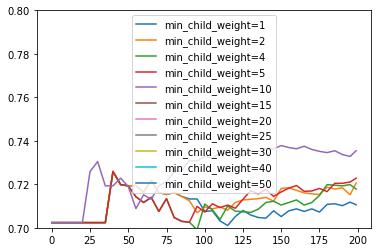

In [187]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()
plt.ylim(0.70,0.80)

`min_child_weight` of 10 seems to be the best option.

In [188]:
df_score = scores['min_child_weight=10']
df_score[df_score.val_auc == df_score.val_auc.max()]

,num_iter,train_auc,val_auc
30,150,0.81263,0.7378


# Training the final XGboost model

In [189]:
xgb_params = {
    'eta': 0.05,    
    'max_depth': 1,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=150)
y_pred = model.predict(dval)
print('Result of Final Gradient Boosting Model:')
print(f'ROC AUC score: {roc_auc_score(y_val, y_pred).round(3)}')

Result of Final Gradient Boosting Model:
ROC AUC score: 0.738


# Final decision on the best model

Looking at the performance of the following models:
- `logistic regression`: 0.714

- `Decision Tree`: 0.714

- `RandomForestClassifier`: 0.726

- `Gradient Boosting`: 0.738

The best model is the `Gradient Boosting`, we will train a final model using the full train data.

# Using XGboost on the full train dataset

In [190]:
y_full_train = df_full_train['loan_status'].values
del df_full_train['loan_status']

In [191]:
dv = DictVectorizer(sparse = False)

full_train_dict = df_full_train.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')


X_full_train = dv.fit_transform(full_train_dict)
X_test = dv.transform(test_dict)

features = dv.get_feature_names()
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dtest = xgb.DMatrix(X_test, feature_names=features)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [192]:
xgb_params = {
    'eta': 0.05,    
    'max_depth': 1,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=150)
y_pred = model.predict(dtest)
print('Result of Final Gradient Boosting Model:')
print(f'ROC AUC score: {roc_auc_score(y_test, y_pred).round(3)}')

Result of Final Gradient Boosting Model:
ROC AUC score: 0.794


Using the `full train data`, a better `AUC` of `0.794` as against the `val data` which was `0.738` 

# Saving the final model using pickle

In [193]:
import pickle

In [194]:
output_file = 'model.bin'
output_file

'model.bin'

In [195]:
with open(output_file,'wb') as f_out: 
    pickle.dump((dv, model), f_out)

# Load the model

In [9]:
import pickle
import xgboost as xgb

In [2]:
model_file = 'model.bin'

with open(model_file, 'rb') as f_in:
    dv, model = pickle.load(f_in)


In [3]:
dv, model

(DictVectorizer(sparse=False), <xgboost.core.Booster at 0x2630f1d0940>)

In [4]:
customer = {
 'Loan_ID': 'LP001003',
 'Gender': 'Male',
 'Married': 'Yes',
 'Dependents': '1',
 'Education': 'Graduate',
 'Self_Employed': 'No',
 'ApplicantIncome': 4583,
 'CoapplicantIncome': 1508.0,
 'LoanAmount': 128.0,
 'Loan_Amount_Term': 360.0,
 'Credit_History': 1.0,
 'Property_Area': 'Rural'
}

In [13]:
x = dv.transform([customer])
dx = xgb.DMatrix(x, feature_names=dv.get_feature_names())
y_pred = model.predict(dx).round(3)
loan_approved = y_pred >= 0.5 


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
float(y_pred)

0.11100000143051147

In [15]:
bool(loan_approved)

False